# PROBLEM **1** 

---
## Perceptron learning algorithm



importing libraries

In [72]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def train_perceptron(x, y, w, nb_epochs_max):  
  for e in range(nb_epochs_max):
    nb_changes = 0
    for i in range(x.size(0)):

      if x[i].dot(w) * y[i] <= 0:
        w = w + y[i] * x[i]
        nb_changes = nb_changes + 1
    if nb_changes == 0:
        print('stopped soon;)')
        break;
  print('Number of changes: %d'%nb_changes)  # prints the number of chages in the end
  changes.append(nb_changes)  
  return w

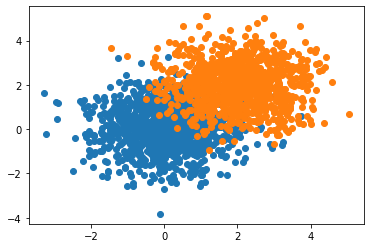

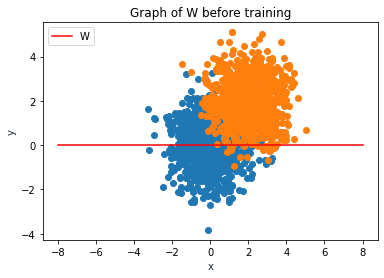

Number of changes: 238
tensor([-3.1764, -3.9040,  6.0000])


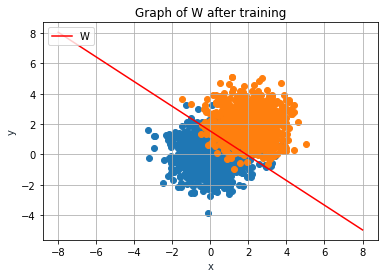

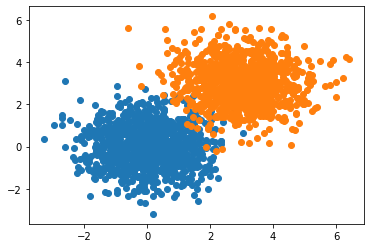

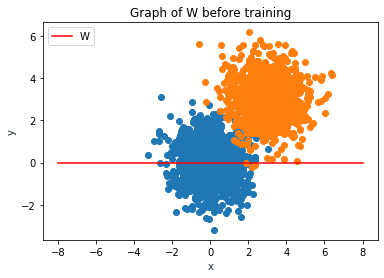

Number of changes: 43
tensor([-4.7820, -7.5504, 18.0000])


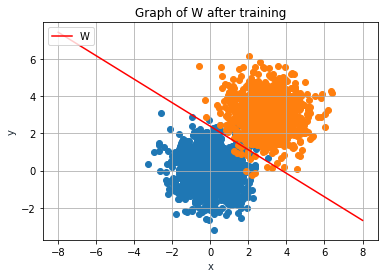

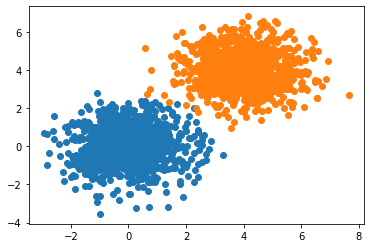

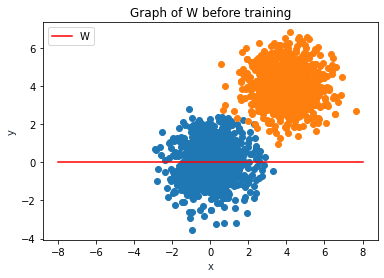

Number of changes: 7
tensor([-3.9885, -7.0612, 21.0000])


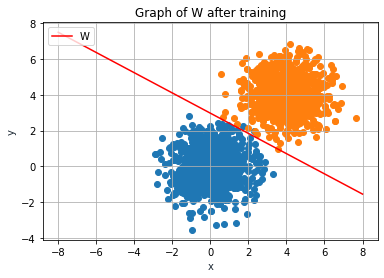

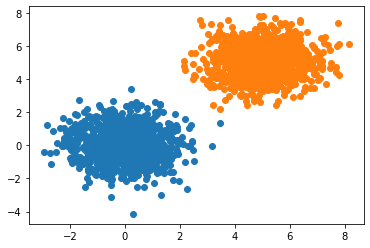

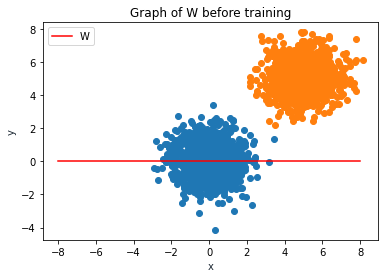

Number of changes: 3
tensor([-4.3632, -4.9463, 18.0000])


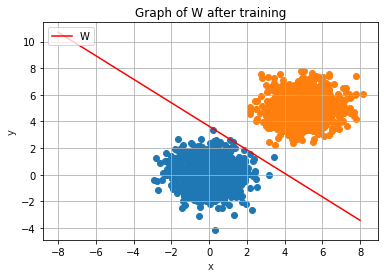

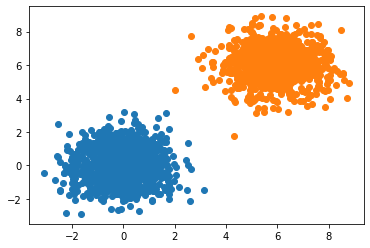

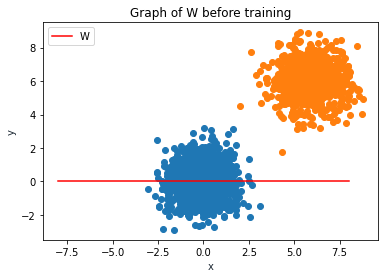

stopped soon;)
Number of changes: 0
tensor([-1.0834, -1.0006,  6.0000])


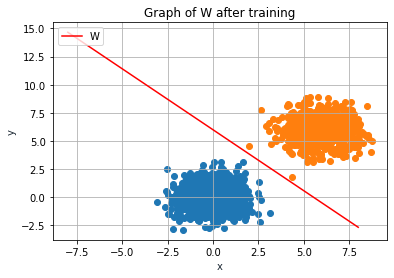

In [102]:
changes=[]
seperability=[]
for i in range(5):
  Data1=torch.normal(0.0, 1.0,size=[1000,2])
  Data2=torch.normal(2.0+i, 1.0,size=[1000,2])
  seperability.append(i)
  plt.scatter(Data1[:,0], Data1[:,1])
  plt.scatter(Data2[:,0], Data2[:,1])
  plt.show()
  X=torch.empty(2000,Data1.size(1)+1).fill_(1)
  X[::2,:2] = Data1
  X[1::2,:2] = Data2


    # prepare the labels
  Y=torch.empty(2000,1)
  Y[::2,:2] = 1.0
  Y[1::2,:2] = -1.0
  #print(Y.shape)
  W = torch.zeros(X.size(1))
  x = np.linspace(-8,8,1000)
  #x = np.linspace(-5,5,1000)
  y = np.zeros(1000,) 
  plt.plot(x, y, '-r', label='W')
  plt.title('Graph of W before training')
  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')
  plt.legend(loc='upper left')
  plt.scatter(Data1[:,0], Data1[:,1])
  plt.scatter(Data2[:,0], Data2[:,1])
  #plt.grid()
  plt.show()
  W = train_perceptron(X,Y, W, 5)
  print(W)



  x = np.linspace(-8,8,1000)
  y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
  plt.plot(x, y, '-r', label='W')
  plt.title('Graph of W after training')
  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')
  plt.legend(loc='upper left')
  plt.scatter(Data1[:,0], Data1[:,1])
  plt.scatter(Data2[:,0], Data2[:,1])
  plt.grid()
  plt.show()

In [103]:
changes,seperability

([238, 43, 7, 3, 0], [0, 1, 2, 3, 4])

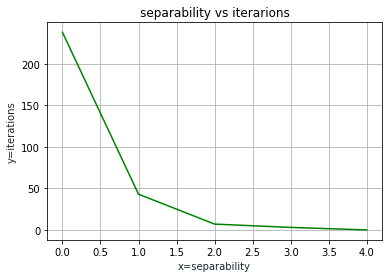

In [104]:
plt.plot(seperability,changes,'-g')
plt.title('separability vs iterarions')
plt.xlabel('x=separability', color='#1C2833')
plt.ylabel('y=iterations', color='#1C2833')
plt.grid()
plt.show()

In [105]:
W

tensor([-1.0834, -1.0006,  6.0000])

## **OBSERVATION**

---
The increase  in seperability reduces the number of iterations to converge .this is because when data is more seperable it is easy to draft a seperating line .



## PROBLEM **2** 

---
# Gradient descent for training a linear classifier



i used **HINGELOSS** here as the given data is linearly seperabale  as it has a unique minimum
hingeloss=max(0, 1 - y * (w^T x + b))


1.   w=weight matrix
2.   x=datapoints(features)
3.   y=ground truth 
4.   b=bias 






<class 'numpy.ndarray'> <class 'numpy.ndarray'>


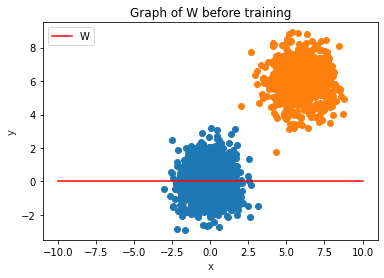

In [106]:
y = np.zeros(1000,) 
x = np.linspace(-10,10,1000)
print(type(x),type(y))
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(Data1[:,0], Data1[:,1])
plt.scatter(Data2[:,0], Data2[:,1])

plt.show()

 GRADIENT COMPUTATION

In [107]:
eta=0.1
w=torch.zeros(X.size(1))
for x,y in zip(X,Y):
      y_hat=np.dot(w,x)
      loss=max(1-(y*y_hat),0)
      grad_w=-y*(1-y*y_hat>0)
      w-=eta*grad_w*x   
    


# **update_equation:**: w-=eta.grad_w.x 
here bias is added in the W vector hence explicitly bias is not taken

In [108]:
w_new=w

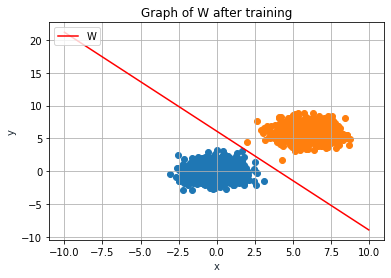

In [109]:
x = np.linspace(-10,10,1000)
y = -(w_new[0].item()/w_new[1].item())*x - (w_new[2].item()/w_new[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(Data1[:,0], Data1[:,1])
plt.scatter(Data2[:,0], Data2[:,1])
plt.grid()
plt.show()

# **PROBLEM 3**

---
# MLP with a single hidden layer



In [92]:
#generating not linearly separable data
def generate_data():
  X=torch.normal(0.0, 1,size=[1000,2])
  Y=torch.empty(X.shape[0]).fill_(0)
  i=0
  for ele in X:
    if(np.linalg.norm(ele)>0.5):
      Y[i]=1
    else:
      Y[i]= 0
    i=i+1  
  plt.scatter(X[:,0], X[:, 1], c = Y)
  return X,Y


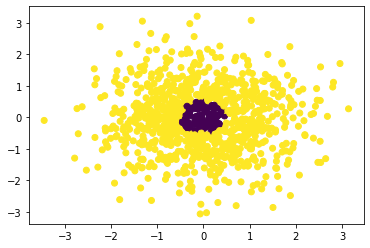

In [93]:
X,Y=generate_data()
#data visualization

Initialising parameters


1.   W1 is the weights of the edges passing from inputLayer to hiddenLayer
2.   b1 is the bias of the edges passing from inputLayer to hiddenLayer
3.   W2 is the weights of the edges passing from HiddenLayer to OutLayer
4.   b2 is the bias of the edges passing from inputLayer to OutLayer



In [94]:
  Y=torch.reshape(Y,(Y.shape[0],1))
  W1 = np.random.randn(X.shape[1],4) * 0.01
  b1 = np.zeros(shape =(1,4))
  W2 = np.random.randn(4,Y.shape[1]) * 0.01
  b2 = np.zeros(shape =(1,Y.shape[1]))


In [95]:
def ReLu(x):
  return np.maximum(0, x)

# ReLU derivative function
def ReLU_derivative(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

In [96]:
def forward_pass(X,W1,W2,b1,b2):
  Z1 = np.dot(X, W1) + b1
  #Z1 =W1^t*x+b1
  A1 = ReLu(Z1)
  #A1=Activation1=ReLu(z1)
  Z2 = np.dot(A1,W2) + b2
  #Z2=W2^T*A1+b2
  Z2= torch.from_numpy(Z2)
  A2 = torch.sigmoid(Z2)
  #A2=activation2=sigmoid(Z2)

  return A2,Z2,Z1,A1,W1,W2,b1,b2


i used **LOGLOSS** here <br>
here y_p=predicted Y<br>
loss=$-{(y\log(y_p) + (1 - y)\log(1 - y_p))}$



In [97]:
def loss_func(A2, Y):
  m = Y.shape[1]
  sum = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
  loss=-np.mean(sum.numpy())
  return loss,m

BACK PROPOGATION

---

The loss used here is logloss :
$$\frac{\partial l}{\partial w2} = \sum_{i=1}^n A1^t-Y(A2-Y) $$
$$\frac{\partial l}{\partial b2} = \sum_{i=1}^n A2-Y $$
similarly differtiate w.r.t w2 and b2
relu and  its differetiation is declared above
 

In [98]:
def back_propagation(W1, b1, W2, b2, A1,A2,Z1,Z2,learning_rate):

  dZ2 = A2 - Y
  #print(dZ2.shape)
  #print(W1)
  dW2 = (1 / m) * np.dot(A1.T,dZ2)
  db2 = (1 / m) * torch.sum(dZ2)
  dZ1 = np.multiply(np.dot(dZ2,W2.T), ReLU_derivative(A1))
  dW1 = (1 / m) * np.dot(X.T,dZ1)
  db1 = (1 / m) * torch.sum(torch.tensor(dZ1))
  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1.numpy()
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2.numpy()

  return W1, W2, b1, b2


for 1000 times we are runnding the loop all the functions are declared above<br>
The forword_pass function returns w1_new ,b1_new,w2_new,b2_new ,these parameters are again passed to backpropogation function ,this is done until we get optimum value for the parameters 

In [99]:
import math
loss_array=[]
iter=[]
for i in range(0, 1000):
  A2,Z1,Z2,A1,W1_new,W2_new,b1_new,b2_new=forward_pass(X,W1,W2,b1,b2)
  loss,m= loss_func(A2, Y)
  W1, W2, b1, b2 = back_propagation(W1_new, b1_new, W2_new, b2_new, A1,A2,Z1,Z2,0.005)
  if loss and i % 10 == 0:
    if(math.isnan(loss)==False):
      print ("Cost at iteration % i: % f" % (i, loss))
    
    
  loss_array.append(loss)
  iter.append(i)


Cost at iteration  0:  0.693212
Cost at iteration  10:  0.362532
Cost at iteration  20:  0.353548
Cost at iteration  30:  0.300949
Cost at iteration  40:  0.251357
Cost at iteration  50:  0.211632
Cost at iteration  60:  0.180944
Cost at iteration  70:  0.157259
Cost at iteration  80:  0.128143
Cost at iteration  90:  0.101508


<ipython-input-97-2f4a66d3b2f7>:3: RuntimeWarning: divide by zero encountered in log
  sum = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
<ipython-input-97-2f4a66d3b2f7>:3: RuntimeWarning: invalid value encountered in multiply
  sum = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))


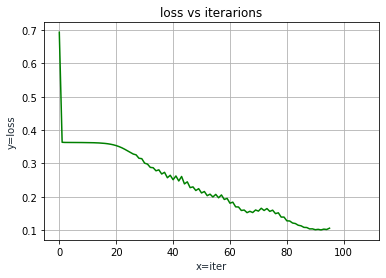

In [100]:
plt.plot(iter,loss_array,'-g')
plt.title('loss vs iterarions')
plt.xlabel('x=iter', color='#1C2833')

plt.ylabel('y=loss', color='#1C2833')
plt.grid()
plt.show()

Text(0, 0.5, 'X2')

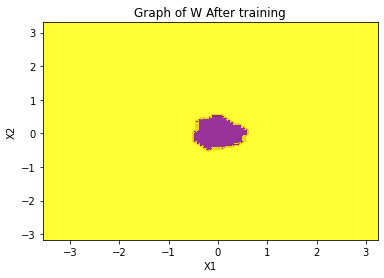

In [101]:
min1, max1 = X[:, 0].min()-0.1, X[:, 0].max()+0.1
min2, max2 = X[:, 1].min()-0.1, X[:, 1].max()+0.1
xx, yy = np.meshgrid(np.linspace(min1, max1, 100), np.linspace(min2, max2, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
a2,Z1,Z2,A1,W1_new,W2_new,b1_new,b2_new=forward_pass(X_grid,W1,W2,b1,b2)
a2 = (a2.ravel() > 0.5) * 2 - 1
plt.title('Graph of W After training')
plt.contourf(xx, yy, a2.reshape(xx.shape), colors=['purple', 'yellow'], alpha=0.8)
plt.xlabel('X1')
plt.ylabel('X2')

in the above graph we developed a boundries for 2 different classes